<a href="https://colab.research.google.com/github/suneetpaul/Natural-Language-Processing/blob/main/sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/smsspamcollection (1).tsv" , sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


balancing data

In [ ]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [ ]:
#data = ham.append(spam, ignore_index=True )  not working

data = pd.concat([ham,spam] , axis=0)

In [ ]:
data

,label,message,length,punct
84,ham,Yup next stop.,14,1
1200,ham,NEFT Transaction with reference number &lt;#&...,164,25
1977,ham,Lol alright i was thinkin that too haha,39,0
3344,ham,"I haven't forgotten you, i might have a couple...",91,4
1035,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,103,0
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


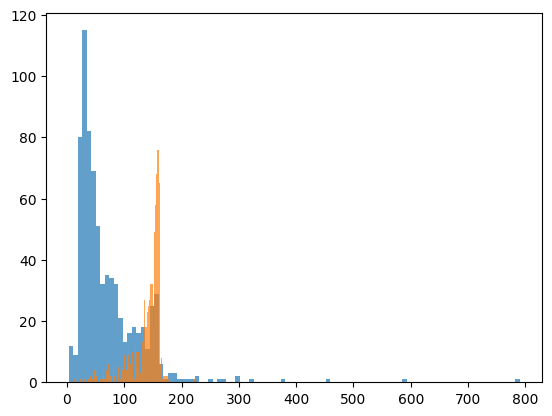

In [ ]:
plt.hist(data[data['label']=='ham']['length'], bins=100 , alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100 , alpha=0.7)
plt.show()

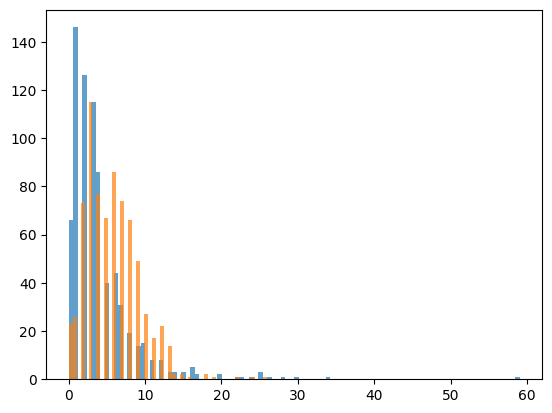

In [ ]:
plt.hist(data[data['label']=='ham']['punct'], bins=100 , alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=50 , alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train  , y_test = train_test_split(data['message'] , data['label'], test_size=0.3 , random_state=0)

In [ ]:
x_train

,message
5110,You have 1 new message. Please call 08715205273
4379,"Doing nothing, then u not having dinner w us?"
4663,Ladies first and genus second k .
4726,There'll be a minor shindig at my place later ...
4162,Had your mobile 11 months or more? U R entitle...
...,...
95,Your free ringtone is waiting to be collected....
607,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
3501,Dorothy@kiefer.com (Bank of Granite issues Str...
873,I'll text you when I drop x off


In [ ]:
y_train

,label
5110,spam
4379,ham
4663,ham
4726,ham
4162,spam
...,...
95,spam
607,spam
3501,spam
873,ham


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble  import RandomForestClassifier

In [ ]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [ ]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


In [ ]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [ ]:
y_pre = classifier.predict(x_test)

In [ ]:
acc(y_pre , y_test)

0.9465478841870824
              precision    recall  f1-score   support

         ham       0.99      0.91      0.95       245
        spam       0.91      0.99      0.94       204

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

[[224  21]
 [  3 201]]


In [ ]:
classifier.predict(['Hello, you are learning Natural Language Processing'])

array(['ham'], dtype=object)

In [ ]:
classifier.predict(['Congratulation, you won a lottery ticket worth $1 million! To claim call on 4455673 '])

array(['spam'], dtype=object)

In [ ]:
classifier.predict(['Congratulation, you won a lottery ticket worth $1 million! '])

array(['ham'], dtype=object)

#svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
classification = Pipeline([('tfidf' , TfidfVectorizer()) , ('classifier' , SVC(C= 100 , gamma='auto'))])

In [ ]:
classification.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [ ]:
y_pred = classification.predict(x_test)

In [ ]:
acc(y_pred , y_test)

0.9487750556792873
              precision    recall  f1-score   support

         ham       0.98      0.93      0.95       240
        spam       0.92      0.98      0.95       209

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449

[[222  18]
 [  5 204]]
